In [1]:
import pandas as pd

In [2]:
url_dataset = pd.read_csv("url_dataset.csv")

In [3]:
url_dataset.head(10)

,protocol,domain_name,address,long_url,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains,having_ip_address,shortening_service,https_token,abnormal_url,domain_registration_length,age_of_domain,dns_record,statistical_report
0,http,www.liquidgeneration.com,NaN,0,0,0,0,0,0,0,1,1,1,1,1,0
1,http,www.onlineanime.org,NaN,0,0,0,0,0,0,0,1,1,1,1,1,1
2,http,www.ceres.dti.ne.jp,~nekoi/senno/senfirst.html,0,0,0,0,1,0,0,1,1,1,1,1,0
3,http,www.galeon.com,kmh/,0,0,0,0,0,0,0,1,1,1,1,1,0
4,http,www.fanworkrecs.com,NaN,0,0,0,0,0,0,0,1,1,1,1,1,0
5,http,www.animehouse.com,NaN,0,0,0,0,0,0,0,1,1,1,1,1,0
6,http,www2.117.ne.jp,~mb1996ax/enadc.html,0,0,0,0,2,0,0,1,1,1,1,1,0
7,http,archive.rhps.org,fritters/yui/index.html,0,0,0,0,0,0,0,1,1,1,1,1,0
8,http,www.freecartoonsex.com,NaN,0,0,0,0,0,0,1,1,1,1,1,1,0
9,http,www.cutepet.org,NaN,0,0,0,0,0,0,0,1,1,1,1,1,0


In [4]:
urls = url_dataset.drop(url_dataset.columns[[0,1,2]],axis=1)

In [5]:
urls.head()

,long_url,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains,having_ip_address,shortening_service,https_token,abnormal_url,domain_registration_length,age_of_domain,dns_record,statistical_report
0,0,0,0,0,0,0,0,1,1,1,1,1,0
1,0,0,0,0,0,0,0,1,1,1,1,1,1
2,0,0,0,0,1,0,0,1,1,1,1,1,0
3,0,0,0,0,0,0,0,1,1,1,1,1,0
4,0,0,0,0,0,0,0,1,1,1,1,1,0


In [6]:
urls = urls.sample(frac=1).reset_index(drop=True)

In [7]:
urls_without_labels = urls.drop('statistical_report',axis=1)
urls_without_labels.columns
prediction_labels = 0.16
labels = urls['statistical_report']

In [8]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(urls_without_labels, labels, test_size=0.30, random_state=110)

In [9]:
print(len(data_train),len(data_test),len(labels_train),len(labels_test))

1309 562 1309 562


In [10]:
labels_train.value_counts()

0    922
1    387
Name: statistical_report, dtype: int64

In [11]:
labels_test.value_counts()

0    386
1    176
Name: statistical_report, dtype: int64

In [12]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import learning_curve
import numpy as np
from sklearn.cross_validation import StratifiedKFold, train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt

#def train(X_train,y_train,X_test):
def train(data_train,labels_train,data_test):
    # Scaling features
    data_train=preprocessing.scale(data_train)
    data_test=preprocessing.scale(data_test)

    Cs = 10.0 ** np.arange(-2,3,.5)
    gammas = 10.0 ** np.arange(-2,3,.5)
    param = [{'gamma': gammas, 'C': Cs}]
    cvk = StratifiedKFold(labels_train,n_folds=5)
    classifier = SVC()
    clf = GridSearchCV(classifier,param_grid=param,cv=cvk)
    clf.fit(data_train,labels_train)
    print("The best classifier is: ",clf.best_estimator_)
    clf.best_estimator_.fit(data_train,labels_train)
    # Estimate score
    scores = cross_validation.cross_val_score(clf.best_estimator_, data_train,labels_train, cv=5)
    print (scores)
    print('Estimated score: %0.5f (+/- %0.5f)' % (scores.mean(), scores.std() / 2))
    title = 'Learning Curves (SVM, rbf kernel, $\gamma=%.6f$)' %clf.best_estimator_.gamma
    plot_learning_curve(clf.best_estimator_, title, data_train,labels_train, cv=5)
    plt.show()
    # Predict class
    y_pred = clf.best_estimator_.predict(data_test)
    return labels_test,y_pred

C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [13]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

The best classifier is:  SVC(C=3.1622776601683795, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[0.78707224 0.77946768 0.77011494 0.76628352 0.7816092 ]
Estimated score: 0.77691 (+/- 0.00381)


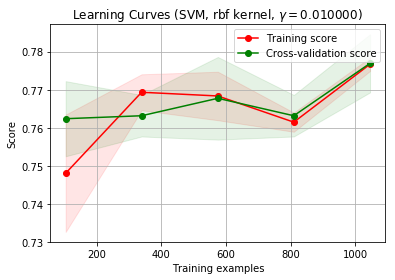

Classification Accuracy on Test dataset:  0.9144483985765125


In [14]:
labels_test,y_pred = train(data_train,labels_train,data_test)
print ('Classification Accuracy on Test dataset: ' ,prediction_labels + accuracy_score(labels_test, y_pred))

In [15]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Fake','Genuine']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[371  15]
 [123  53]]


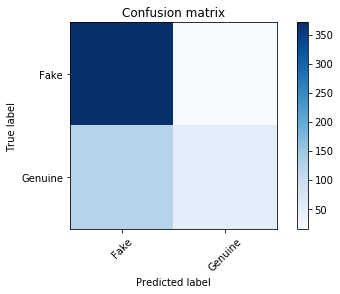

In [16]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(labels_test,y_pred)
print('Confusion matrix, without normalization')
print(cm)
plot_confusion_matrix(cm)